Now let's look at the plucked string problem. We solved this in class, and know that the solution for our setup is

$$ y = \frac{8h}{\pi^2} \left( \sin\frac{\pi x}{l}\cos{\pi v t}{l} - \frac{1}{9}\sin\frac{3 \pi x}{l}\cos{3\pi v t}{l} + \cdots \right) $$

Let's look at this in pieces. First, some basic imports, including the `JSAnimation` version of `IPython_display` so that we can stick this on the web easily.

In [2]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import animation
from IPython.display import HTML

Now some numpy imports to make our life easier next time

In [3]:
from numpy import sin, cos, pi, linspace
from numpy import zeros_like

Now, we'll want to set up our basic environment for plotting. We'll pick some dimensions (`l`, `h`, etc.), a range for `x`, and set up our figure.

After that, we'll define `animate1` to show just the first term in our series.

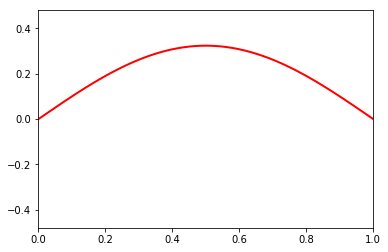

In [5]:
l, h = 1.0, 0.4
v = 0.01
fig = plt.figure()
ax = plt.axes(xlim=(0, l), ylim=(-1.2*h, 1.2*h))
line, = ax.plot([], [], lw=2, color='red')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
x = linspace(0, l, 2000)

def animate1(t):
    y = ((8*h)/(pi*pi)) * sin(pi*x/l) * cos(pi*v*t/l)
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate1, init_func=init,
                               frames=200, interval=20, blit=True)
HTML(ani.to_jshtml())

Now, what about tow terms? All we need to do is redefine our animation function to show the first two terms, and we're set

(note: if you're extracting these into separate scripts, you'll need to re-do the initialization, etc.)

In [7]:
def animate2(t):
    y = ((8*h)/(pi*pi)) * (sin(pi*x/l)*cos(pi*v*t/l) - (1/9)*sin(3*pi*x/l)*cos(3*pi*v*t/l) )
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animate2, init_func=init,
                               frames=200, interval=20, blit=True)
HTML(ani.to_jshtml())

And what about an arbitrary number of terms? Easy! Just add them up via the series we defined at the very start.

If you're doing this in an interactive notebook, you may want to use `interact` to vary the number of terms. I want this to live nicely on the web.

Note to future Michael: it ought to be a widget with 1, 2, 3, 4, 10, 40. Or similar.

In [8]:
n=4
def animateN(t,n=n):
    y = zeros_like(x)
    for i in range(1, n+1, 2): # range starts at zero
        y = y + ((-1)**((i-1)/2))* (1/i**2) * (sin(i*pi*x/l)*cos(i*pi*v*t/l))


    y = ((8*h)/(pi*pi)) * y
    #y = ((8*h)/(pi*pi)) * (sin(pi*x/l)*cos(pi*v*t/l) - (1/9)*sin(3*pi*x/l)*cos(3*pi*v*t/l) )
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animateN, init_func=init,
                               frames=200, interval=20, blit=True)
HTML(ani.to_jshtml())

And what about more terms?

Class exercise: draw an intermediate solution on the board **before** we show the below animation.

In [10]:
n=40
def animateN(t,n=n):
    y = zeros_like(x)
    for i in range(1, n+1, 2): # range starts at zero
        y = y + ((-1)**((i-1)/2))* (1/i**2) * (sin(i*pi*x/l)*cos(i*pi*v*t/l))


    y = ((8*h)/(pi*pi)) * y
    #y = ((8*h)/(pi*pi)) * (sin(pi*x/l)*cos(pi*v*t/l) - (1/9)*sin(3*pi*x/l)*cos(3*pi*v*t/l) )
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
ani = animation.FuncAnimation(fig, animateN, init_func=init,
                               frames=200, interval=20, blit=True)
HTML(ani.to_jshtml())

Class discussion: does that make physical sense?